# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

2022-07-27 17:26:42.759018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 17:26:42.759048: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
hp = pd.read_csv("train.csv")
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
hp.shape

(1460, 81)

In [5]:
hp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(hp.describe().loc['count',:].min())

1201.0


In [7]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Finding the correlation 
- finding correlation of each feature with salePrice
- getting only those columns whose corr > 0.3 and corr != 1
- get extract columns found from above point in dataframe (desiredFeaturesHp).

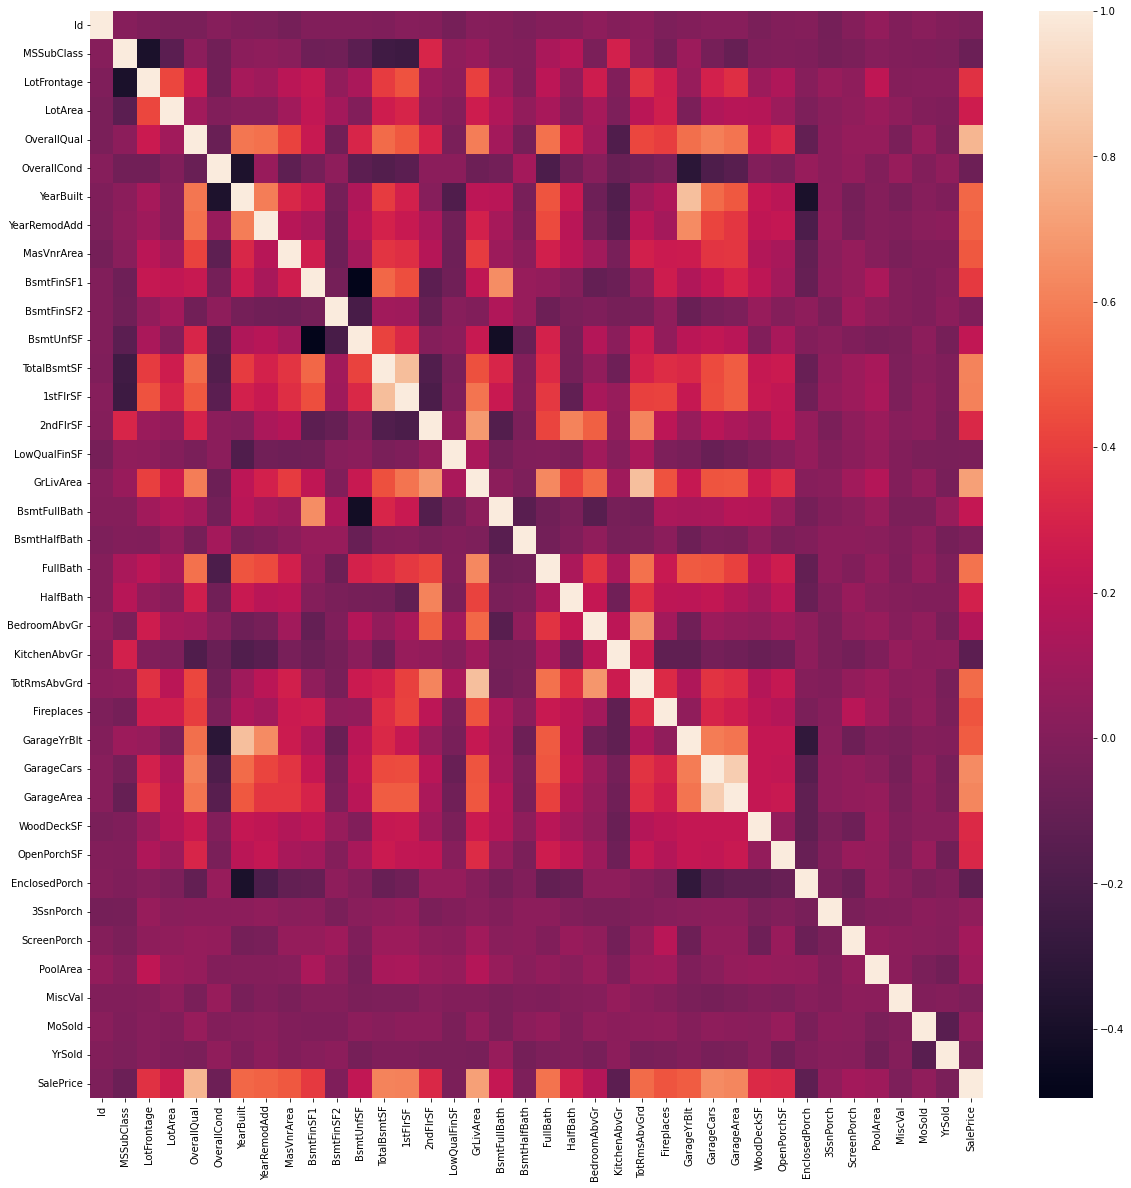

In [8]:
correlations = hp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations)
plt.show()

In [9]:
corr_series = correlations[:]['SalePrice']
# print(corr_series)
req_features_corr = corr_series[(corr_series>0.4)] # not equal to 1 to ignore the salePrice with itself
desired_cols = list(req_features_corr.to_dict().keys())
desiredFeaturesHp = pd.DataFrame(hp, columns=desired_cols)
desiredFeaturesHp.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000


In [10]:
desiredFeaturesHp.shape

(1460, 14)

# Apply Pre-processing on updated DataFrame

In [11]:
desiredFeaturesHp.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [12]:
desiredFeaturesHp.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,1515.463699,1.565068,6.517808,0.613014,1978.506164,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,181.066207,438.705324,386.587738,525.480383,0.550916,1.625393,0.644666,24.689725,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,755000.000000


In [13]:
desiredFeaturesHp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1452 non-null   float64
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   Fireplaces    1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  GarageCars    1460 non-null   int64  
 12  GarageArea    1460 non-null   int64  
 13  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


In [14]:
# desiredFeaturesHp.dropna(axis=0,
#                          how='any', 
#                          subset=['GarageYrBlt', 'LotFrontage', 'MasVnrArea'],
#                          inplace=True)
desiredFeaturesHp.dropna(axis=0,
                         how='any',                          
                         inplace=True)
# "OverallQual":"GarageArea"

In [15]:
desiredFeaturesHp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1371 non-null   int64  
 1   YearBuilt     1371 non-null   int64  
 2   YearRemodAdd  1371 non-null   int64  
 3   MasVnrArea    1371 non-null   float64
 4   TotalBsmtSF   1371 non-null   int64  
 5   1stFlrSF      1371 non-null   int64  
 6   GrLivArea     1371 non-null   int64  
 7   FullBath      1371 non-null   int64  
 8   TotRmsAbvGrd  1371 non-null   int64  
 9   Fireplaces    1371 non-null   int64  
 10  GarageYrBlt   1371 non-null   float64
 11  GarageCars    1371 non-null   int64  
 12  GarageArea    1371 non-null   int64  
 13  SalePrice     1371 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 160.7 KB


Break the dataFrame into input and output

In [16]:
# inp_features = desiredFeaturesHp.loc[:,"LotFrontage": "OpenPorchSF"]
inp_features = desiredFeaturesHp.loc[:,"OverallQual":"GarageArea"]

inp_features.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [17]:
print("total Columns excluding output column: ", len(inp_features.columns))

total Columns excluding output column:  13


In [18]:
def sale_price_norm(price):
    return price/10e5

desiredFeaturesHp['NormalizedSalePrice'] = desiredFeaturesHp['SalePrice'].apply(sale_price_norm)
output = desiredFeaturesHp['NormalizedSalePrice']
print(desiredFeaturesHp['SalePrice'].max())
print(output.max())

755000
0.755


In [19]:
desiredFeaturesHp.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# Break the dataFrame into input and output

In [21]:
X = desiredFeaturesHp.loc[:,"OverallQual":"GarageArea"]
y = desiredFeaturesHp['NormalizedSalePrice']

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1371 non-null   int64  
 1   YearBuilt     1371 non-null   int64  
 2   YearRemodAdd  1371 non-null   int64  
 3   MasVnrArea    1371 non-null   float64
 4   TotalBsmtSF   1371 non-null   int64  
 5   1stFlrSF      1371 non-null   int64  
 6   GrLivArea     1371 non-null   int64  
 7   FullBath      1371 non-null   int64  
 8   TotRmsAbvGrd  1371 non-null   int64  
 9   Fireplaces    1371 non-null   int64  
 10  GarageYrBlt   1371 non-null   float64
 11  GarageCars    1371 non-null   int64  
 12  GarageArea    1371 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 150.0 KB


In [23]:
y

0       0.208500
1       0.181500
2       0.223500
3       0.140000
4       0.250000
          ...   
1455    0.175000
1456    0.210000
1457    0.266500
1458    0.142125
1459    0.147500
Name: NormalizedSalePrice, Length: 1371, dtype: float64

In [24]:
# # reading the test csv file
# test_df = pd.read_csv("test.csv")
# test_features_in = pd.DataFrame(test_df, columns=desired_cols[:-1]).values
# test_features_in

# train test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    shuffle=True)


In [26]:
x_train.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,6.163321,1972.714416,1984.953467,107.521898,1070.745438,1174.45073,1537.520985,1.591241,6.587591,0.631387,1978.494526,1.867701,499.739051
std,1.326845,29.568242,20.691088,183.275134,442.257670,388.39917,526.978321,0.537945,1.598399,0.641830,24.762801,0.629428,185.677472
min,2.000000,1880.000000,1950.000000,0.000000,0.000000,438.00000,438.000000,0.000000,3.000000,0.000000,1900.000000,1.000000,160.000000
25%,5.000000,1955.000000,1966.000000,0.000000,807.500000,894.00000,1147.500000,1.000000,6.000000,0.000000,1961.000000,1.000000,380.000000
50%,6.000000,1975.000000,1994.000000,0.000000,1000.000000,1095.50000,1478.500000,2.000000,6.000000,1.000000,1981.000000,2.000000,484.000000
75%,7.000000,2001.000000,2004.000000,168.250000,1314.000000,1408.00000,1795.000000,2.000000,7.000000,1.000000,2002.000000,2.000000,577.000000
max,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.00000,5642.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 565 to 1199
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1096 non-null   int64  
 1   YearBuilt     1096 non-null   int64  
 2   YearRemodAdd  1096 non-null   int64  
 3   MasVnrArea    1096 non-null   float64
 4   TotalBsmtSF   1096 non-null   int64  
 5   1stFlrSF      1096 non-null   int64  
 6   GrLivArea     1096 non-null   int64  
 7   FullBath      1096 non-null   int64  
 8   TotRmsAbvGrd  1096 non-null   int64  
 9   Fireplaces    1096 non-null   int64  
 10  GarageYrBlt   1096 non-null   float64
 11  GarageCars    1096 non-null   int64  
 12  GarageArea    1096 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 119.9 KB


# Data Normalization

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)

# X_train = scaler.transform(x_train)
# X_test = scaler.transform(x_test)
X_train = preprocessing.normalize(x_train)
X_test = preprocessing.normalize(x_test)

In [29]:
X_train

array([[1.53531635e-03, 4.90021802e-01, 4.98977814e-01, ...,
        4.91301233e-01, 2.55886059e-04, 5.52713887e-02],
       [1.53698589e-03, 5.06436851e-01, 5.11047809e-01, ...,
        5.06693016e-01, 5.12328631e-04, 1.26032843e-01],
       [8.05345999e-04, 5.23474899e-01, 5.23474899e-01, ...,
        5.33407500e-01, 5.36897333e-04, 1.07379467e-01],
       ...,
       [1.29534444e-03, 5.19692189e-01, 5.19951257e-01, ...,
        5.19951257e-01, 5.18137775e-04, 1.03627555e-01],
       [1.33313962e-03, 5.13258754e-01, 5.19924452e-01, ...,
        5.13258754e-01, 2.66627924e-04, 1.19982566e-01],
       [9.75775931e-04, 4.78862038e-01, 4.82765142e-01, ...,
        4.81545422e-01, 4.87887965e-04, 1.11970288e-01]])

In [30]:
X_test

array([[2.04774732e-03, 4.92739199e-01, 5.10912956e-01, ...,
        4.92739199e-01, 2.55968415e-04, 5.83607986e-02],
       [1.16526762e-03, 4.58882388e-01, 4.58882388e-01, ...,
        4.58882388e-01, 4.66107047e-04, 1.17458976e-01],
       [1.45611445e-03, 4.14576585e-01, 4.14576585e-01, ...,
        4.14576585e-01, 6.24049050e-04, 1.36458726e-01],
       ...,
       [1.78463043e-03, 4.46157608e-01, 4.46157608e-01, ...,
        4.46157608e-01, 4.46157608e-04, 1.12431717e-01],
       [1.42171449e-03, 4.66322353e-01, 4.66322353e-01, ...,
        4.66322353e-01, 4.73904830e-04, 1.36484591e-01],
       [1.55412004e-03, 5.10528433e-01, 5.10528433e-01, ...,
        5.12600594e-01, 5.18040014e-04, 1.49195524e-01]])

In [31]:
Y_train = y_train.values
Y_train

array([0.128 , 0.151 , 0.0929, ..., 0.1675, 0.088 , 0.148 ])

In [32]:
Y_test = y_test.values
Y_test

array([0.161   , 0.135   , 0.26    , 0.2749  , 0.13    , 0.124   ,
       0.1535  , 0.1589  , 0.09035 , 0.141   , 0.18585 , 0.13    ,
       0.173   , 0.1925  , 0.085   , 0.24    , 0.1725  , 0.146   ,
       0.214   , 0.091   , 0.225   , 0.1059  , 0.271   , 0.143   ,
       0.18    , 0.2604  , 0.132   , 0.093   , 0.274   , 0.263435,
       0.145   , 0.192   , 0.141   , 0.12    , 0.147   , 0.11    ,
       0.117   , 0.125   , 0.1325  , 0.1145  , 0.15    , 0.091   ,
       0.1216  , 0.155   , 0.1325  , 0.1975  , 0.126   , 0.286   ,
       0.1685  , 0.174   , 0.345   , 0.385   , 0.1299  , 0.402861,
       0.254   , 0.3375  , 0.142   , 0.1799  , 0.319   , 0.135   ,
       0.155835, 0.226   , 0.274725, 0.215   , 0.12    , 0.233   ,
       0.24    , 0.145   , 0.241   , 0.232   , 0.129   , 0.1725  ,
       0.257   , 0.2025  , 0.108959, 0.123   , 0.302   , 0.152   ,
       0.23    , 0.1095  , 0.08    , 0.317   , 0.1049  , 0.17    ,
       0.3591  , 0.194201, 0.3199  , 0.157   , 0.336   , 0.189

# Applying regression models

### Applying linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train, Y_train)

0.7492282523714483

In [34]:
X_test.reshape(-1,1)

array([[0.00204775],
       [0.4927392 ],
       [0.51091296],
       ...,
       [0.51260059],
       [0.00051804],
       [0.14919552]])

In [35]:
y_pred = reg.predict(X_test)

In [36]:
Y_test = y_test.values
Y_test

array([0.161   , 0.135   , 0.26    , 0.2749  , 0.13    , 0.124   ,
       0.1535  , 0.1589  , 0.09035 , 0.141   , 0.18585 , 0.13    ,
       0.173   , 0.1925  , 0.085   , 0.24    , 0.1725  , 0.146   ,
       0.214   , 0.091   , 0.225   , 0.1059  , 0.271   , 0.143   ,
       0.18    , 0.2604  , 0.132   , 0.093   , 0.274   , 0.263435,
       0.145   , 0.192   , 0.141   , 0.12    , 0.147   , 0.11    ,
       0.117   , 0.125   , 0.1325  , 0.1145  , 0.15    , 0.091   ,
       0.1216  , 0.155   , 0.1325  , 0.1975  , 0.126   , 0.286   ,
       0.1685  , 0.174   , 0.345   , 0.385   , 0.1299  , 0.402861,
       0.254   , 0.3375  , 0.142   , 0.1799  , 0.319   , 0.135   ,
       0.155835, 0.226   , 0.274725, 0.215   , 0.12    , 0.233   ,
       0.24    , 0.145   , 0.241   , 0.232   , 0.129   , 0.1725  ,
       0.257   , 0.2025  , 0.108959, 0.123   , 0.302   , 0.152   ,
       0.23    , 0.1095  , 0.08    , 0.317   , 0.1049  , 0.17    ,
       0.3591  , 0.194201, 0.3199  , 0.157   , 0.336   , 0.189

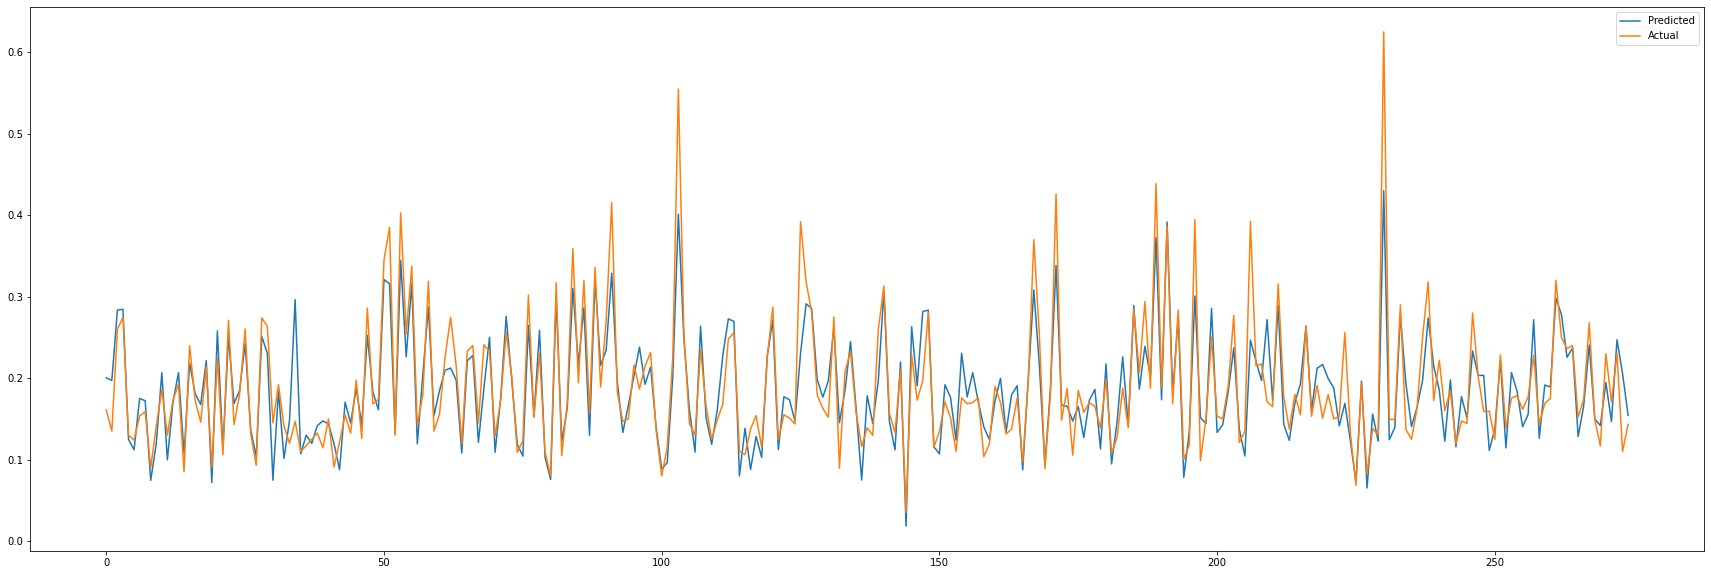

In [37]:
plt.figure(figsize=(30,10))
plt.plot(y_pred)
plt.plot(Y_test)
plt.legend(["Predicted", "Actual"])
print("\n"*2)

### Applying XGBOOST

In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3,
                          learning_rate = 1,
                          max_depth = 5, 
                          n_estimators = 10)

xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))
xg_reg.score(X_test, Y_test)

[17:28:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.041664


0.7332454068261687

[0.15194847 0.16224729 0.3557422  0.2843032  0.13443509]
[0.161  0.135  0.26   0.2749 0.13  ]


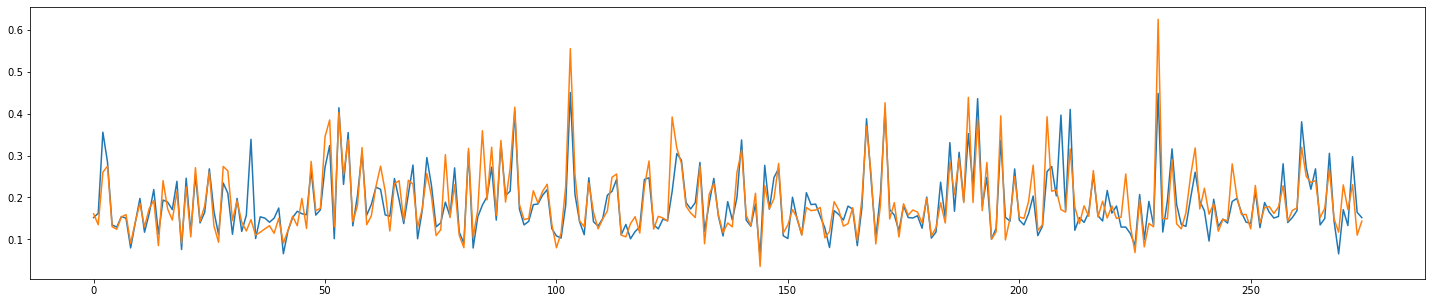

In [39]:
print(preds[:5])
print(Y_test[:5])
plt.figure(figsize=(25,5))
plt.plot(preds)
plt.plot(Y_test)
plt.show()

### Applying Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth = 4, 
                                                   random_state=42)
DecisionTreeRegressorModel.fit(X_train, Y_train)
DecisionTreeRegressorModel.score(X_train, Y_train)

0.8291499720452746

error:  0.15689662533206516
error:  0.02668030663252855


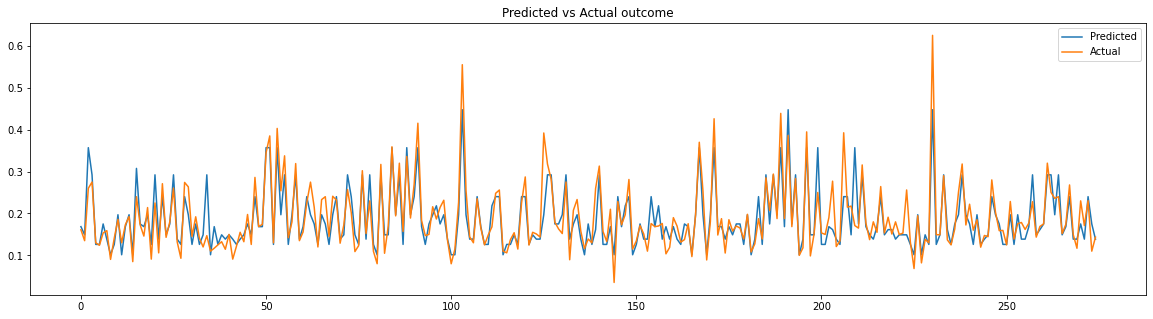

In [41]:
plt.figure(figsize=(20,5))
y_pred_dec = DecisionTreeRegressorModel.predict(X_test)
print("error: ", mean_squared_error(y_pred_dec, Y_test)*100)
print("error: ", mean_absolute_error(y_pred_dec, Y_test))
plt.plot(y_pred_dec)
plt.plot(Y_test)
plt.title("Predicted vs Actual outcome")
plt.legend(["Predicted", "Actual"])


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
errors = mean_squared_error(preds, Y_test)
errors

0.0017359101693256323

In [43]:
mean_absolute_error(preds, Y_test)

0.027673396698077803

### Apply ANN

In [44]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [63]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=10, input_dim=13, 
                kernel_initializer='normal', 
                activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=7, 
                kernel_initializer='normal', 
                activation='tanh'))

# Since we will be predicting a single number
model.add(Dense(1,
                kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
 
# Fitting the ANN to the Training set
model.fit(X_train, Y_train, 
          batch_size = 8, 
          epochs = 10, 
          validation_data=(X_test, Y_test),
          verbose=2)

Epoch 1/10
137/137 - 1s - loss: 0.0139 - val_loss: 0.0063 - 680ms/epoch - 5ms/step
Epoch 2/10
137/137 - 0s - loss: 0.0056 - val_loss: 0.0057 - 279ms/epoch - 2ms/step
Epoch 3/10
137/137 - 0s - loss: 0.0049 - val_loss: 0.0044 - 274ms/epoch - 2ms/step
Epoch 4/10
137/137 - 0s - loss: 0.0035 - val_loss: 0.0031 - 267ms/epoch - 2ms/step
Epoch 5/10
137/137 - 0s - loss: 0.0026 - val_loss: 0.0023 - 274ms/epoch - 2ms/step
Epoch 6/10
137/137 - 0s - loss: 0.0024 - val_loss: 0.0026 - 273ms/epoch - 2ms/step
Epoch 7/10
137/137 - 0s - loss: 0.0024 - val_loss: 0.0023 - 269ms/epoch - 2ms/step
Epoch 8/10
137/137 - 0s - loss: 0.0023 - val_loss: 0.0023 - 272ms/epoch - 2ms/step
Epoch 9/10
137/137 - 0s - loss: 0.0022 - val_loss: 0.0022 - 267ms/epoch - 2ms/step
Epoch 10/10
137/137 - 0s - loss: 0.0022 - val_loss: 0.0021 - 265ms/epoch - 2ms/step


In [64]:
X_train[0].shape

(13,)

9/9 [==============================] - 0s 2ms/step
[0.14150463 0.22287413 0.284543   0.2688249  0.1543357  0.15774427
 0.20135194 0.15964742 0.06526157 0.14716676]
[0.161   0.135   0.26    0.2749  0.13    0.124   0.1535  0.1589  0.09035
 0.141  ]


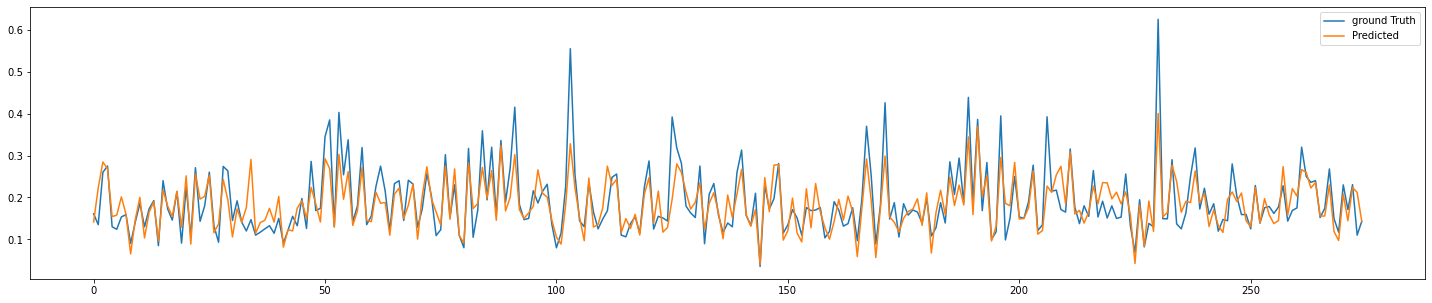

In [65]:
y_hat = model.predict(X_test).reshape(-1)
print(y_hat[:10])

print(Y_test[:10])
plt.figure(figsize=(25,5))
plt.plot(Y_test)
plt.plot(y_hat)
plt.legend(['ground Truth','Predicted'])

In [54]:
# X_train[0].shape
print(model.history.history.keys())
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Training loss Vs Validation Loss")

dict_keys([])


KeyError: 'loss'

In [55]:
results = model.evaluate(X_test, Y_test)
results

8/8 [==============================] - 0s 2ms/step - loss: 0.0022


0.0022455512080341578

In [322]:
# test_in = X_test[0].reshape(1, -1)
print("predicted: ",y_pred.reshape(-1))
print("Ground Truth: ", Y_test[:10]*10e5)

9/9 [==============================] - 0s 2ms/step
predicted:  [0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518 0.8859518
 0.8859518 0.8

/home/m-faizan/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


error:  49.09278133454024
error:  0.6960030861265841


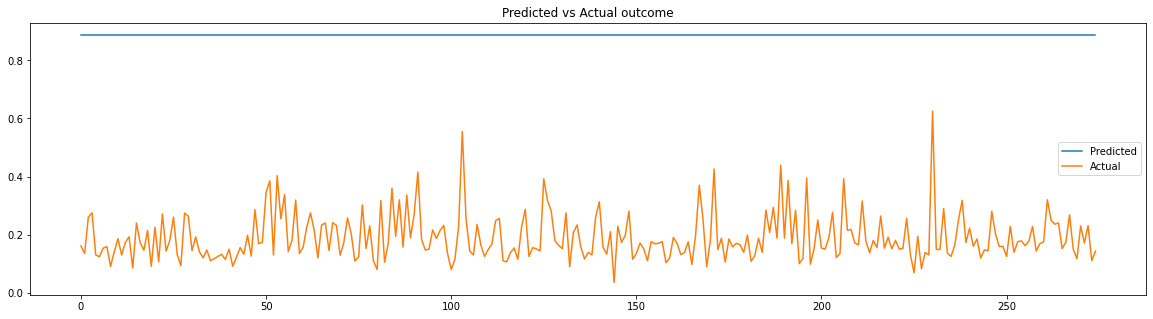

In [323]:
plt.figure(figsize=(20,5))
print("error: ", mean_squared_error(y_pred, Y_test)*100)
print("error: ", mean_absolute_error(y_pred, Y_test))
plt.plot(y_pred)
plt.plot(Y_test)
plt.title("Predicted vs Actual outcome")
plt.legend(["Predicted", "Actual"])

In [324]:
y_pred.reshape(-1).shape, Y_test.shape

((275,), (275,))

### GradientBoostingRegressor

In [325]:
from sklearn.ensemble import GradientBoostingRegressor

In [326]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.043862031300394566

error:  0.6222084513695346
error:  0.06571146722367635


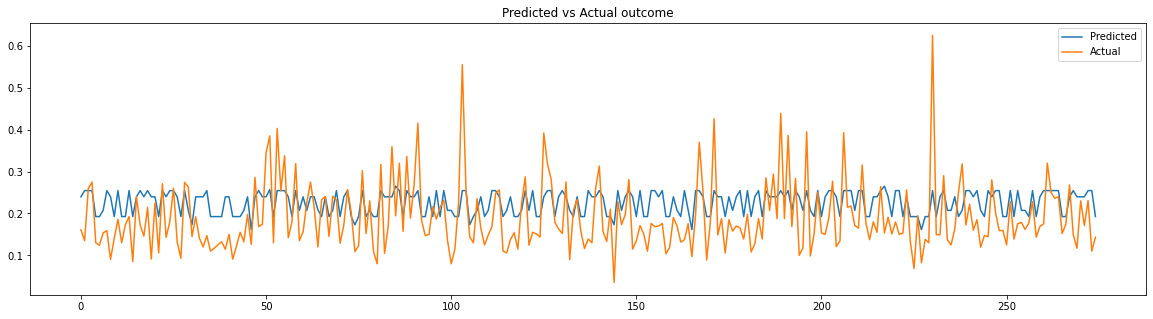

In [327]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(20,5))
print("error: ", mean_squared_error(y_pred, Y_test)*100)
print("error: ", mean_absolute_error(y_pred, Y_test))
plt.plot(y_pred)
plt.plot(Y_test)
plt.title("Predicted vs Actual outcome")
plt.legend(["Predicted", "Actual"])